In [44]:
#Import Statements
import warnings
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
import statistics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import warnings 
warnings.filterwarnings('ignore')

### Data Cleaning

In [45]:
#Import Data
diabetes_df = pd.read_csv('/Users/mel/Desktop/DS4400/diabetes.csv')
print(diabetes_df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [46]:
#Dataframe with Selected Features
diabetes_df = diabetes_df[['Diabetes_012', 'HighBP', 'Income', 'PhysHlth', 'GenHlth', 'BMI', 'Age', 'Sex', 'HvyAlcoholConsump', 'Smoker', 'Veggies']]
diabetes_df.head()

,Diabetes_012,HighBP,Income,PhysHlth,GenHlth,BMI,Age,Sex,HvyAlcoholConsump,Smoker,Veggies
0,0.0,1.0,3.0,15.0,5.0,40.0,9.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,3.0,25.0,7.0,0.0,0.0,1.0,0.0
2,0.0,1.0,8.0,30.0,5.0,28.0,9.0,0.0,0.0,0.0,0.0
3,0.0,1.0,6.0,0.0,2.0,27.0,11.0,0.0,0.0,0.0,1.0
4,0.0,1.0,4.0,0.0,2.0,24.0,11.0,0.0,0.0,0.0,1.0


In [47]:
print(diabetes_df.var())

Diabetes_012          0.487427
HighBP                0.244960
Income                4.289652
PhysHlth             76.002675
GenHlth               1.141644
BMI                  43.674839
Age                   9.328262
Sex                   0.246442
HvyAlcoholConsump     0.053039
Smoker                0.246771
Veggies               0.153018
dtype: float64


These are all visualizations we made to understand our data and the relationship between different features from our subsetted dataframe

<Axes: xlabel='PhysHlth', ylabel='BMI'>

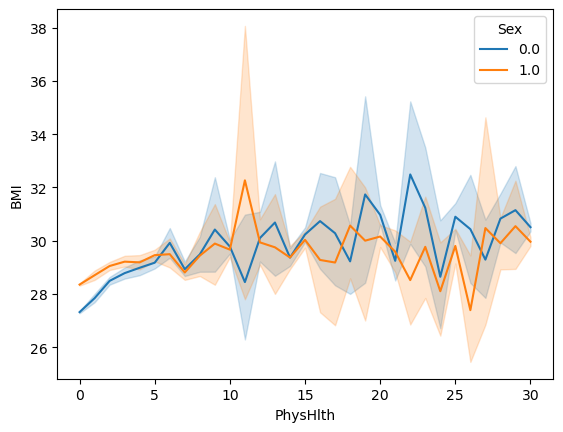

In [48]:
sns.lineplot(data=diabetes_df, x='PhysHlth', y='BMI', hue='Sex')

<Axes: xlabel='Age', ylabel='BMI'>

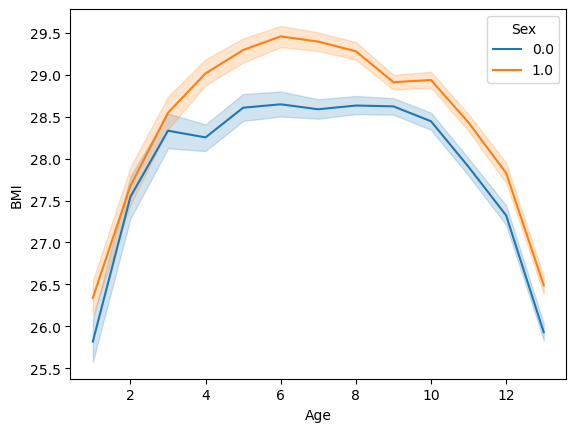

In [49]:
sns.lineplot(data=diabetes_df, x='Age', y='BMI', hue='Sex')

Text(0.5, 1.0, 'Physical Health vs General Health')

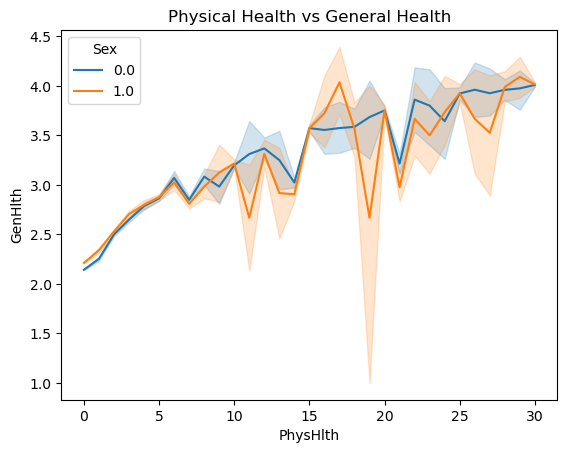

In [50]:
sns.lineplot(data=diabetes_df, x='PhysHlth', y='GenHlth', hue='Sex')
plt.title('Physical Health vs General Health')

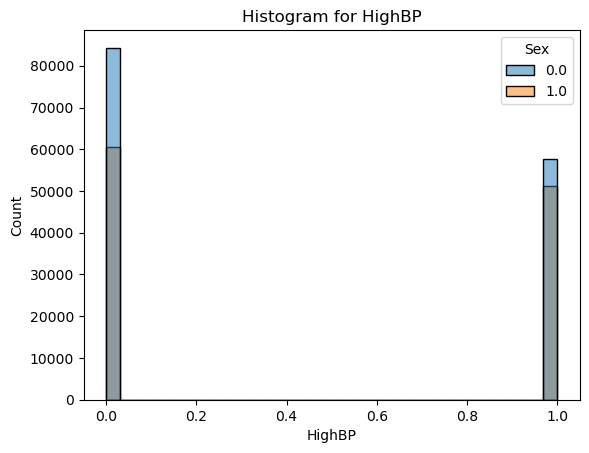

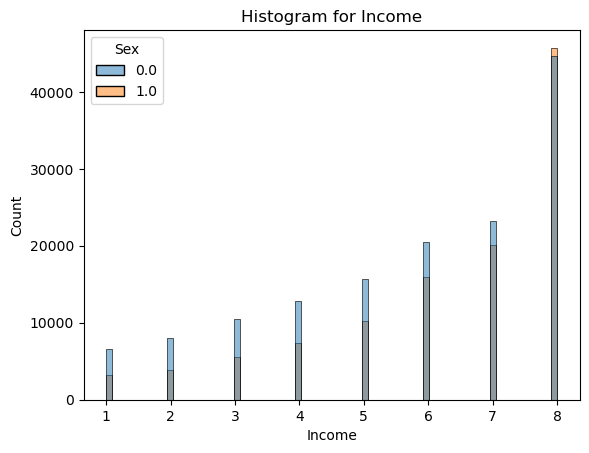

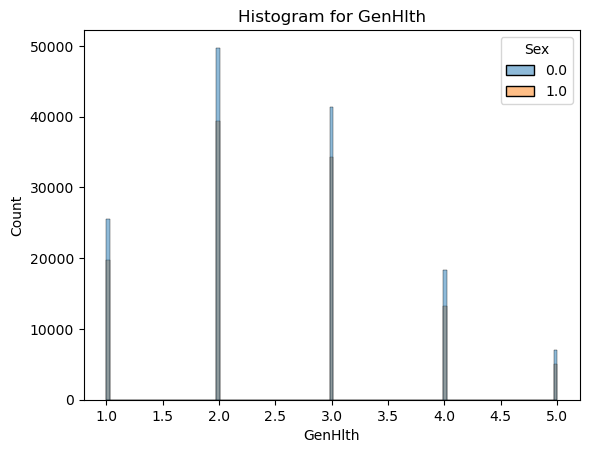

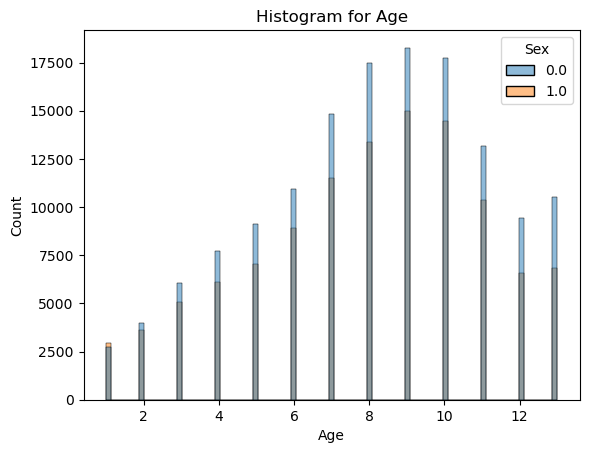

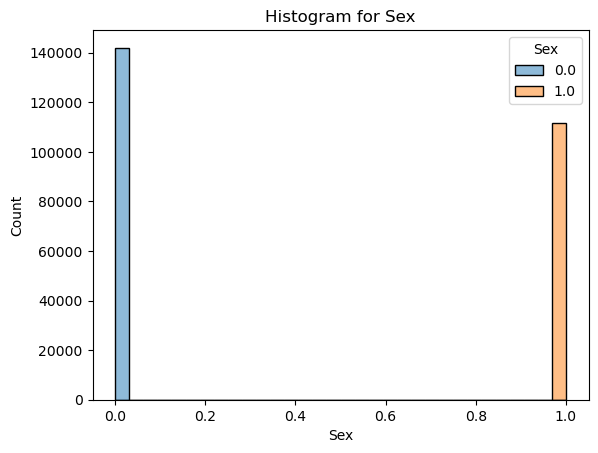

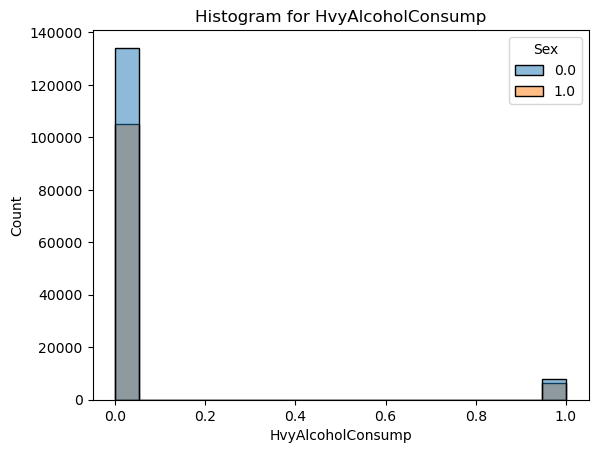

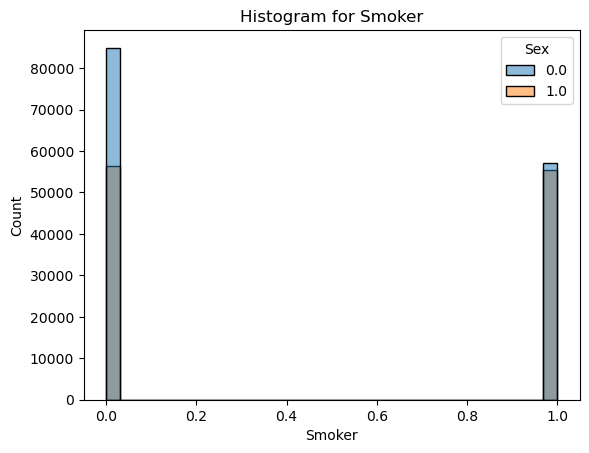

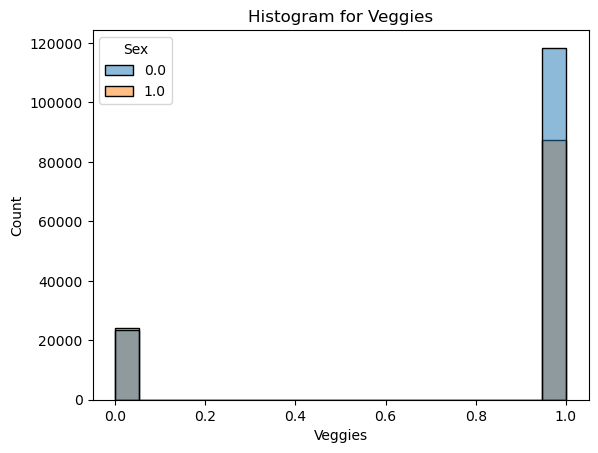

In [51]:
exclude_lst = ['PhysHlth', 'BMI', 'Diabetes_012']
for column in diabetes_df.columns:
    if column not in exclude_lst:
        sns.histplot(data=diabetes_df, x=column, hue='Sex')
        plt.title(f'Histogram for {column}')
        plt.show()

<Axes: >

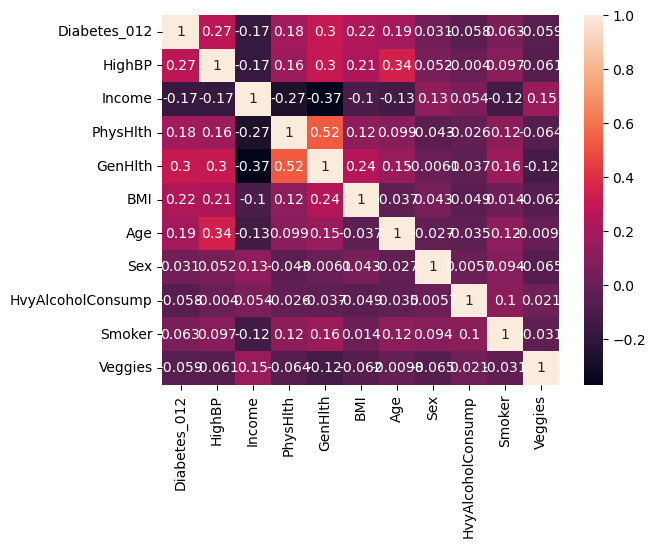

In [52]:
#Heatmap
matrix = diabetes_df.corr()
sns.heatmap(matrix, annot = True)

Checking Values in Dataset

Text(0.5, 1.0, 'Number of People in each Class')

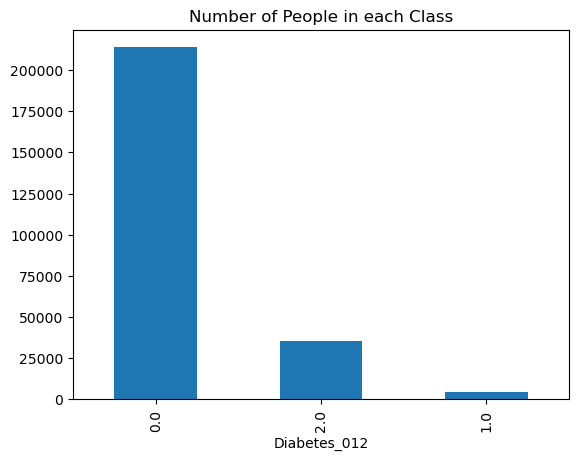

In [53]:
diabetes_df['Diabetes_012'].value_counts().plot(kind='bar')
plt.title('Number of People in each Class')

Dataset is imbalanced so results will be skewed.

In [54]:
#Splitting X and y
X = diabetes_df.iloc[:, 1:]

y = diabetes_df.iloc[:, 0]
print(y)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 253680, dtype: float64


In [55]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, train_size=0.75)

In [56]:
#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Testing Gini vs Information Gain to see which yields better results for Decision Tree

In [57]:
#Gini Decision Tree
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=24)
clf_gini.fit(X_train, y_train)

gini_y_pred = clf_gini.predict(X_test)

#Metrics
gini_accuracy = accuracy_score(y_test, gini_y_pred)

#Precision for each Class
gini_precision = precision_score(y_test, gini_y_pred,labels=[0], average= None, pos_label=0)
gini_precision_1 = precision_score(y_test, gini_y_pred,labels=[1], average= None, pos_label=1)
gini_precision_2 = precision_score(y_test, gini_y_pred, labels=[2], average=None, pos_label=2)

#Recall for each Class
gini_recall = recall_score(y_test, gini_y_pred, labels=[0],average=None, pos_label=0)
gini_recall_1 = recall_score(y_test, gini_y_pred, labels=[1], average=None, pos_label=1)
gini_recall_2 = recall_score(y_test, gini_y_pred, labels=[1], average=None, pos_label=2)

#Precision for each Class
gini_f1 = f1_score(y_test, gini_y_pred, labels=[0], average=None, pos_label=0)
gini_f1_1 = f1_score(y_test, gini_y_pred, labels=[1], average=None, pos_label=1)
gini_f1_2 = f1_score(y_test, gini_y_pred, labels=[2], average=None, pos_label=2)

print('Gini Accuracy:', gini_accuracy, '\n')
print('Gini Precision Class 0:', gini_precision)
print('Gini Precision Class 1:', gini_precision_1)
print('Gini Precision Class 2:', gini_precision_2, '\n')
print('Gini Recall Class 0:', gini_recall)
print('Gini Recall Class 1:', gini_recall_1)
print('Gini Recall Class 2:', gini_recall_2, '\n')
print('Gini F1 Score Class 0:', gini_f1)
print('Gini F1 Score Class 1:', gini_f1_1)
print('Gini F1 Score Class 2:', gini_f1_2)

Gini Accuracy: 0.7950804162724693 

Gini Precision Class 0: [0.87179999]
Gini Precision Class 1: [0.03056351]
Gini Precision Class 2: [0.31966191] 

Gini Recall Class 0: [0.89802969]
Gini Recall Class 1: [0.02898551]
Gini Recall Class 2: [0.02898551] 

Gini F1 Score Class 0: [0.88472047]
Gini F1 Score Class 1: [0.0297536]
Gini F1 Score Class 2: [0.28859144]


In [58]:
#Classification Report
print(classification_report(y_test, gini_y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     53545
         1.0       0.03      0.03      0.03      1104
         2.0       0.32      0.26      0.29      8771

    accuracy                           0.80     63420
   macro avg       0.41      0.40      0.40     63420
weighted avg       0.78      0.80      0.79     63420



In [59]:
#Entropy Decision Tree
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=24)

clf_entropy.fit(X_train, y_train)
entropy_y_pred = clf_entropy.predict(X_test)

#Metrics
entropy_accuracy = accuracy_score(y_test, entropy_y_pred)

#Precision for each Class
entropy_precision = precision_score(y_test, entropy_y_pred, labels=[0], average=None, pos_label=0)
entropy_precision_1 = precision_score(y_test, entropy_y_pred, labels=[1], average=None, pos_label=1)
entropy_precision_2 = precision_score(y_test, entropy_y_pred, labels=[2], average=None, pos_label=2)

#Recall for each Class
entropy_recall = recall_score(y_test, entropy_y_pred, labels=[0], average=None, pos_label=0)
entropy_recall_1 = recall_score(y_test, entropy_y_pred, labels=[1], average=None, pos_label=1)
entropy_recall_2 = recall_score(y_test, entropy_y_pred, labels=[2], average=None, pos_label=2)

#F1 Score for each Class
entropy_f1 = f1_score(y_test, entropy_y_pred, labels=[0], average=None, pos_label=0)
entropy_f1_1 = f1_score(y_test, entropy_y_pred, labels=[1], average=None, pos_label=1)
entropy_f1_2 = f1_score(y_test, entropy_y_pred, labels=[2], average=None, pos_label=2)

print('Entropy Accuracy:', entropy_accuracy, '\n')
print('Entropy Precision Class 0:', entropy_precision)
print('Entropy Precision Class 1:', entropy_precision_1)
print('Entropy Precision Class 2:', entropy_precision_2, '\n')
print('Entropy Recall Class 0:', entropy_recall)
print('Entropy Recall Class 1:', entropy_recall_1)
print('Entropy Recall Class 2:', entropy_recall_2, '\n')
print('Entropy F1 Score Class 0:', entropy_f1)
print('Entropy F1 Score Class 1:', entropy_f1_1)
print('Entropy F1 Score Class 2:', entropy_f1_2)

Entropy Accuracy: 0.7966572059287291 

Entropy Precision Class 0: [0.87141954]
Entropy Precision Class 1: [0.03183521]
Entropy Precision Class 2: [0.32350007] 

Entropy Recall Class 0: [0.90055094]
Entropy Recall Class 1: [0.0307971]
Entropy Recall Class 2: [0.25880743] 

Entropy F1 Score Class 0: [0.88574578]
Entropy F1 Score Class 1: [0.03130755]
Entropy F1 Score Class 2: [0.28756017]


In [60]:
#Classification Report
print(classification_report(y_test, entropy_y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     53545
         1.0       0.03      0.03      0.03      1104
         2.0       0.32      0.26      0.29      8771

    accuracy                           0.80     63420
   macro avg       0.41      0.40      0.40     63420
weighted avg       0.78      0.80      0.79     63420



For both Gini and Entropy the metrics are very close, but the Entropy criterion has a slightly higher accuracy and better recall which is why we will use the Entropy Criterion.

In [61]:
#Max Depth
max_depth_range = range(1, 25)
least_error = 1
train_errors = []
test_errors = []

max_depth_dict = {}
for m in max_depth_range:
    clf_depth = DecisionTreeClassifier(criterion='entropy', max_depth=m, random_state=24)
    clf_depth.fit(X_train, y_train)

    depth_y_train_pred = clf_depth.predict(X_train)
    depth_y_test_pred = clf_depth.predict(X_test)

    #Error
    depth_test_error = 1 - accuracy_score(y_test, depth_y_test_pred)

    max_depth_dict[m] = depth_test_error
    test_errors.append(depth_test_error)

print(max_depth_dict)

{1: 0.15570797855566065, 2: 0.15570797855566065, 3: 0.15570797855566065, 4: 0.15570797855566065, 5: 0.15662251655629134, 6: 0.15184484389782404, 7: 0.15184484389782404, 8: 0.15211289813938822, 9: 0.15258593503626616, 10: 0.15421002838221376, 11: 0.15476190476190477, 12: 0.15830968148848945, 13: 0.1600126143172501, 14: 0.1657048249763482, 15: 0.16969410280668562, 16: 0.17781456953642383, 17: 0.18254493850520337, 18: 0.18796909492273728, 19: 0.19197414064963736, 20: 0.19760327972248504, 21: 0.20077262693156728, 22: 0.201608325449385, 23: 0.20220750551876376, 24: 0.2032008830022075}


In [62]:
#Find which yields lowest Error
least_error = min(max_depth_dict.values())
minimum_key = 0
minimum_keys = [key for key in max_depth_dict if max_depth_dict[key]==least_error]

print('Minimum Key', minimum_keys)

Minimum Key [6, 7]


Since we have two results we will test accuracy to see which one performs better.

In [63]:
clf_6 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=24)
clf_6.fit(X_train, y_train)

y_train_6 = clf_6.predict(X_train)
y_test_6 = clf_6.predict(X_test)

clf_6_accuracy_train = accuracy_score(y_train, y_train_6)
clf_6_accuracy_test = accuracy_score(y_test, y_test_6)

print('Train:', clf_6_accuracy_train)
print('Test:', clf_6_accuracy_test)

Train: 0.8460632818248712
Test: 0.848155156102176


In [64]:
clf_7 = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=24)
clf_7.fit(X_train, y_train)

y_train_7 = clf_7.predict(X_train)
y_test_7 = clf_7.predict(X_test)

clf_7_accuracy_train = accuracy_score(y_train, y_train_7)
clf_7_accuracy_test = accuracy_score(y_test, y_test_7)

print('Train:', clf_7_accuracy_train)
print('Test:', clf_7_accuracy_test)

Train: 0.8460685377903922
Test: 0.848155156102176


[Text(0.5, 0.9375, 'Diabetes_012 <= 0.142\nentropy = 0.712\nsamples = 190260\nvalue = [160158, 3527, 26575]\nclass = No Diabetes'),
 Text(0.25, 0.8125, 'PhysHlth <= -0.013\nentropy = 0.421\nsamples = 108482\nvalue = [100647, 1307, 6528]\nclass = No Diabetes'),
 Text(0.125, 0.6875, 'BMI <= 0.152\nentropy = 0.243\nsamples = 69866\nvalue = [67455, 549, 1862]\nclass = No Diabetes'),
 Text(0.0625, 0.5625, 'GenHlth <= -0.134\nentropy = 0.159\nsamples = 46280\nvalue = [45337.0, 210.0, 733.0]\nclass = No Diabetes'),
 Text(0.03125, 0.4375, 'PhysHlth <= -0.948\nentropy = 0.104\nsamples = 30881\nvalue = [30509, 93, 279]\nclass = No Diabetes'),
 Text(0.015625, 0.3125, 'HighBP <= 0.698\nentropy = 0.048\nsamples = 13773\nvalue = [13708, 26, 39]\nclass = No Diabetes'),
 Text(0.0078125, 0.1875, 'BMI <= -2.138\nentropy = 0.065\nsamples = 5306\nvalue = [5270, 19, 17]\nclass = No Diabetes'),
 Text(0.00390625, 0.0625, 'entropy = 0.0\nsamples = 636\nvalue = [636, 0, 0]\nclass = No Diabetes'),
 Text(0.01171

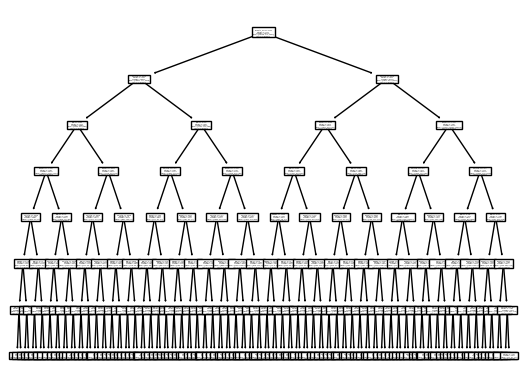

In [65]:
diabetes_columns = diabetes_df.columns

plot_tree(clf_7, max_depth=7, feature_names=diabetes_columns, class_names=['No Diabetes', 'Prediabetes', 'Diabetes'])

In [66]:
#Train and Fit Model
clf_model = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=24)

clf_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=24)

In [67]:
y_pred = clf_model.predict(X_test)

In [68]:
#Metrics
accuracy = accuracy_score(y_test, y_pred)

#Precision for each Class
precision_0 = precision_score(y_test, y_pred, labels=[0], average=None, pos_label=0)
precision_1 = precision_score(y_test, y_pred, labels=[1], average=None, pos_label=1)
precision_2 = precision_score(y_test, y_pred, labels=[2], average=None, pos_label=2)

#Recall for each Class
recall_0 = recall_score(y_test, y_pred, labels=[0], average=None, pos_label=0)
recall_1 = recall_score(y_test, y_pred, labels=[1], average=None, pos_label=1)
recall_2 = recall_score(y_test, y_pred, labels=[2], average=None, pos_label=2)

#F1 Score for each Class
f1_0 = f1_score(y_test, y_pred, labels=[0], average=None, pos_label=0)
f1_1 = f1_score(y_test, y_pred, labels=[1], average=None, pos_label=1)
f1_2 = f1_score(y_test, y_pred, labels=[2], average=None, pos_label=2)

print('Accuracy:', accuracy, '\n')
print('Precision Class 0:', precision_0)
print('Precision Class 1:', precision_1)
print('Precision Class 2:', precision_2, '\n')
print('Recall Class 0:', recall_0)
print('Recall Class 1:', recall_1)
print('Recall Class 2:', recall_2, '\n')
print('F1 Score Class 0:', f1_0)
print('F1 Score Class 1:', f1_1)
print('F1 Score Class 2:', f1_2)

Accuracy: 0.848155156102176 

Precision Class 0: [0.86056266]
Precision Class 1: [0.]
Precision Class 2: [0.5311846] 

Recall Class 0: [0.9808759]
Recall Class 1: [0.]
Recall Class 2: [0.14468134] 

F1 Score Class 0: [0.91678886]
F1 Score Class 1: [0.]
F1 Score Class 2: [0.22741935]


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     53545
         1.0       0.00      0.00      0.00      1104
         2.0       0.53      0.14      0.23      8771

    accuracy                           0.85     63420
   macro avg       0.46      0.38      0.38     63420
weighted avg       0.80      0.85      0.81     63420



0 AUC Score: 0.8067779619886739


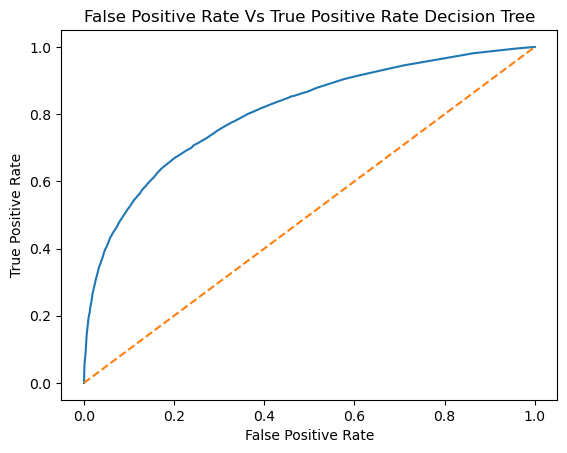

1 AUC Score: 0.6765783539203182


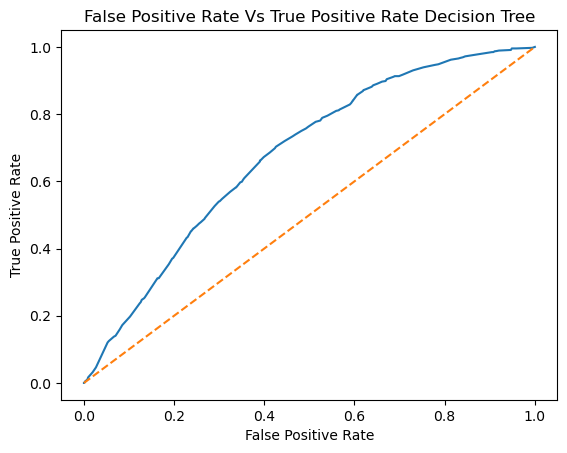

2 AUC Score: 0.8119983461206502


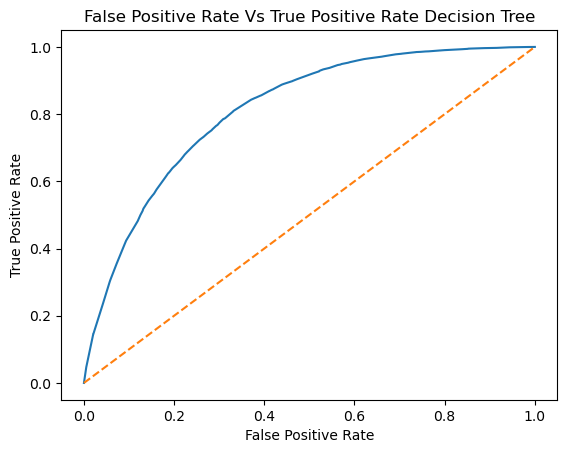

In [70]:
probs = clf_model.predict_proba(X_test)

false_positive_rate = {}
true_positive_rate = {}
roc_auc = {}

for i in range(3):
    false_positive_rate[i], true_positive_rate[i], threshold = roc_curve((y_test == i).astype(int), probs[:, i])
    roc_auc = auc(false_positive_rate[i], true_positive_rate[i])

    print(i, 'AUC Score:', roc_auc)
    plt.plot(false_positive_rate[i], true_positive_rate[i])
    plt.plot([0,1], [0,1], '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('False Positive Rate Vs True Positive Rate Decision Tree')
    plt.show()

[Text(0.5, 0.9375, 'HighBP <= 0.142\nentropy = 0.712\nsamples = 190260\nvalue = [160158, 3527, 26575]\nclass = No Diabetes'),
 Text(0.25, 0.8125, 'GenHlth <= -0.013\nentropy = 0.421\nsamples = 108482\nvalue = [100647, 1307, 6528]\nclass = No Diabetes'),
 Text(0.125, 0.6875, 'Age <= 0.152\nentropy = 0.243\nsamples = 69866\nvalue = [67455, 549, 1862]\nclass = No Diabetes'),
 Text(0.0625, 0.5625, 'BMI <= -0.134\nentropy = 0.159\nsamples = 46280\nvalue = [45337.0, 210.0, 733.0]\nclass = No Diabetes'),
 Text(0.03125, 0.4375, 'GenHlth <= -0.948\nentropy = 0.104\nsamples = 30881\nvalue = [30509, 93, 279]\nclass = No Diabetes'),
 Text(0.015625, 0.3125, 'Income <= 0.698\nentropy = 0.048\nsamples = 13773\nvalue = [13708, 26, 39]\nclass = No Diabetes'),
 Text(0.0078125, 0.1875, 'Age <= -2.138\nentropy = 0.065\nsamples = 5306\nvalue = [5270, 19, 17]\nclass = No Diabetes'),
 Text(0.00390625, 0.0625, 'entropy = 0.0\nsamples = 636\nvalue = [636, 0, 0]\nclass = No Diabetes'),
 Text(0.01171875, 0.0625,

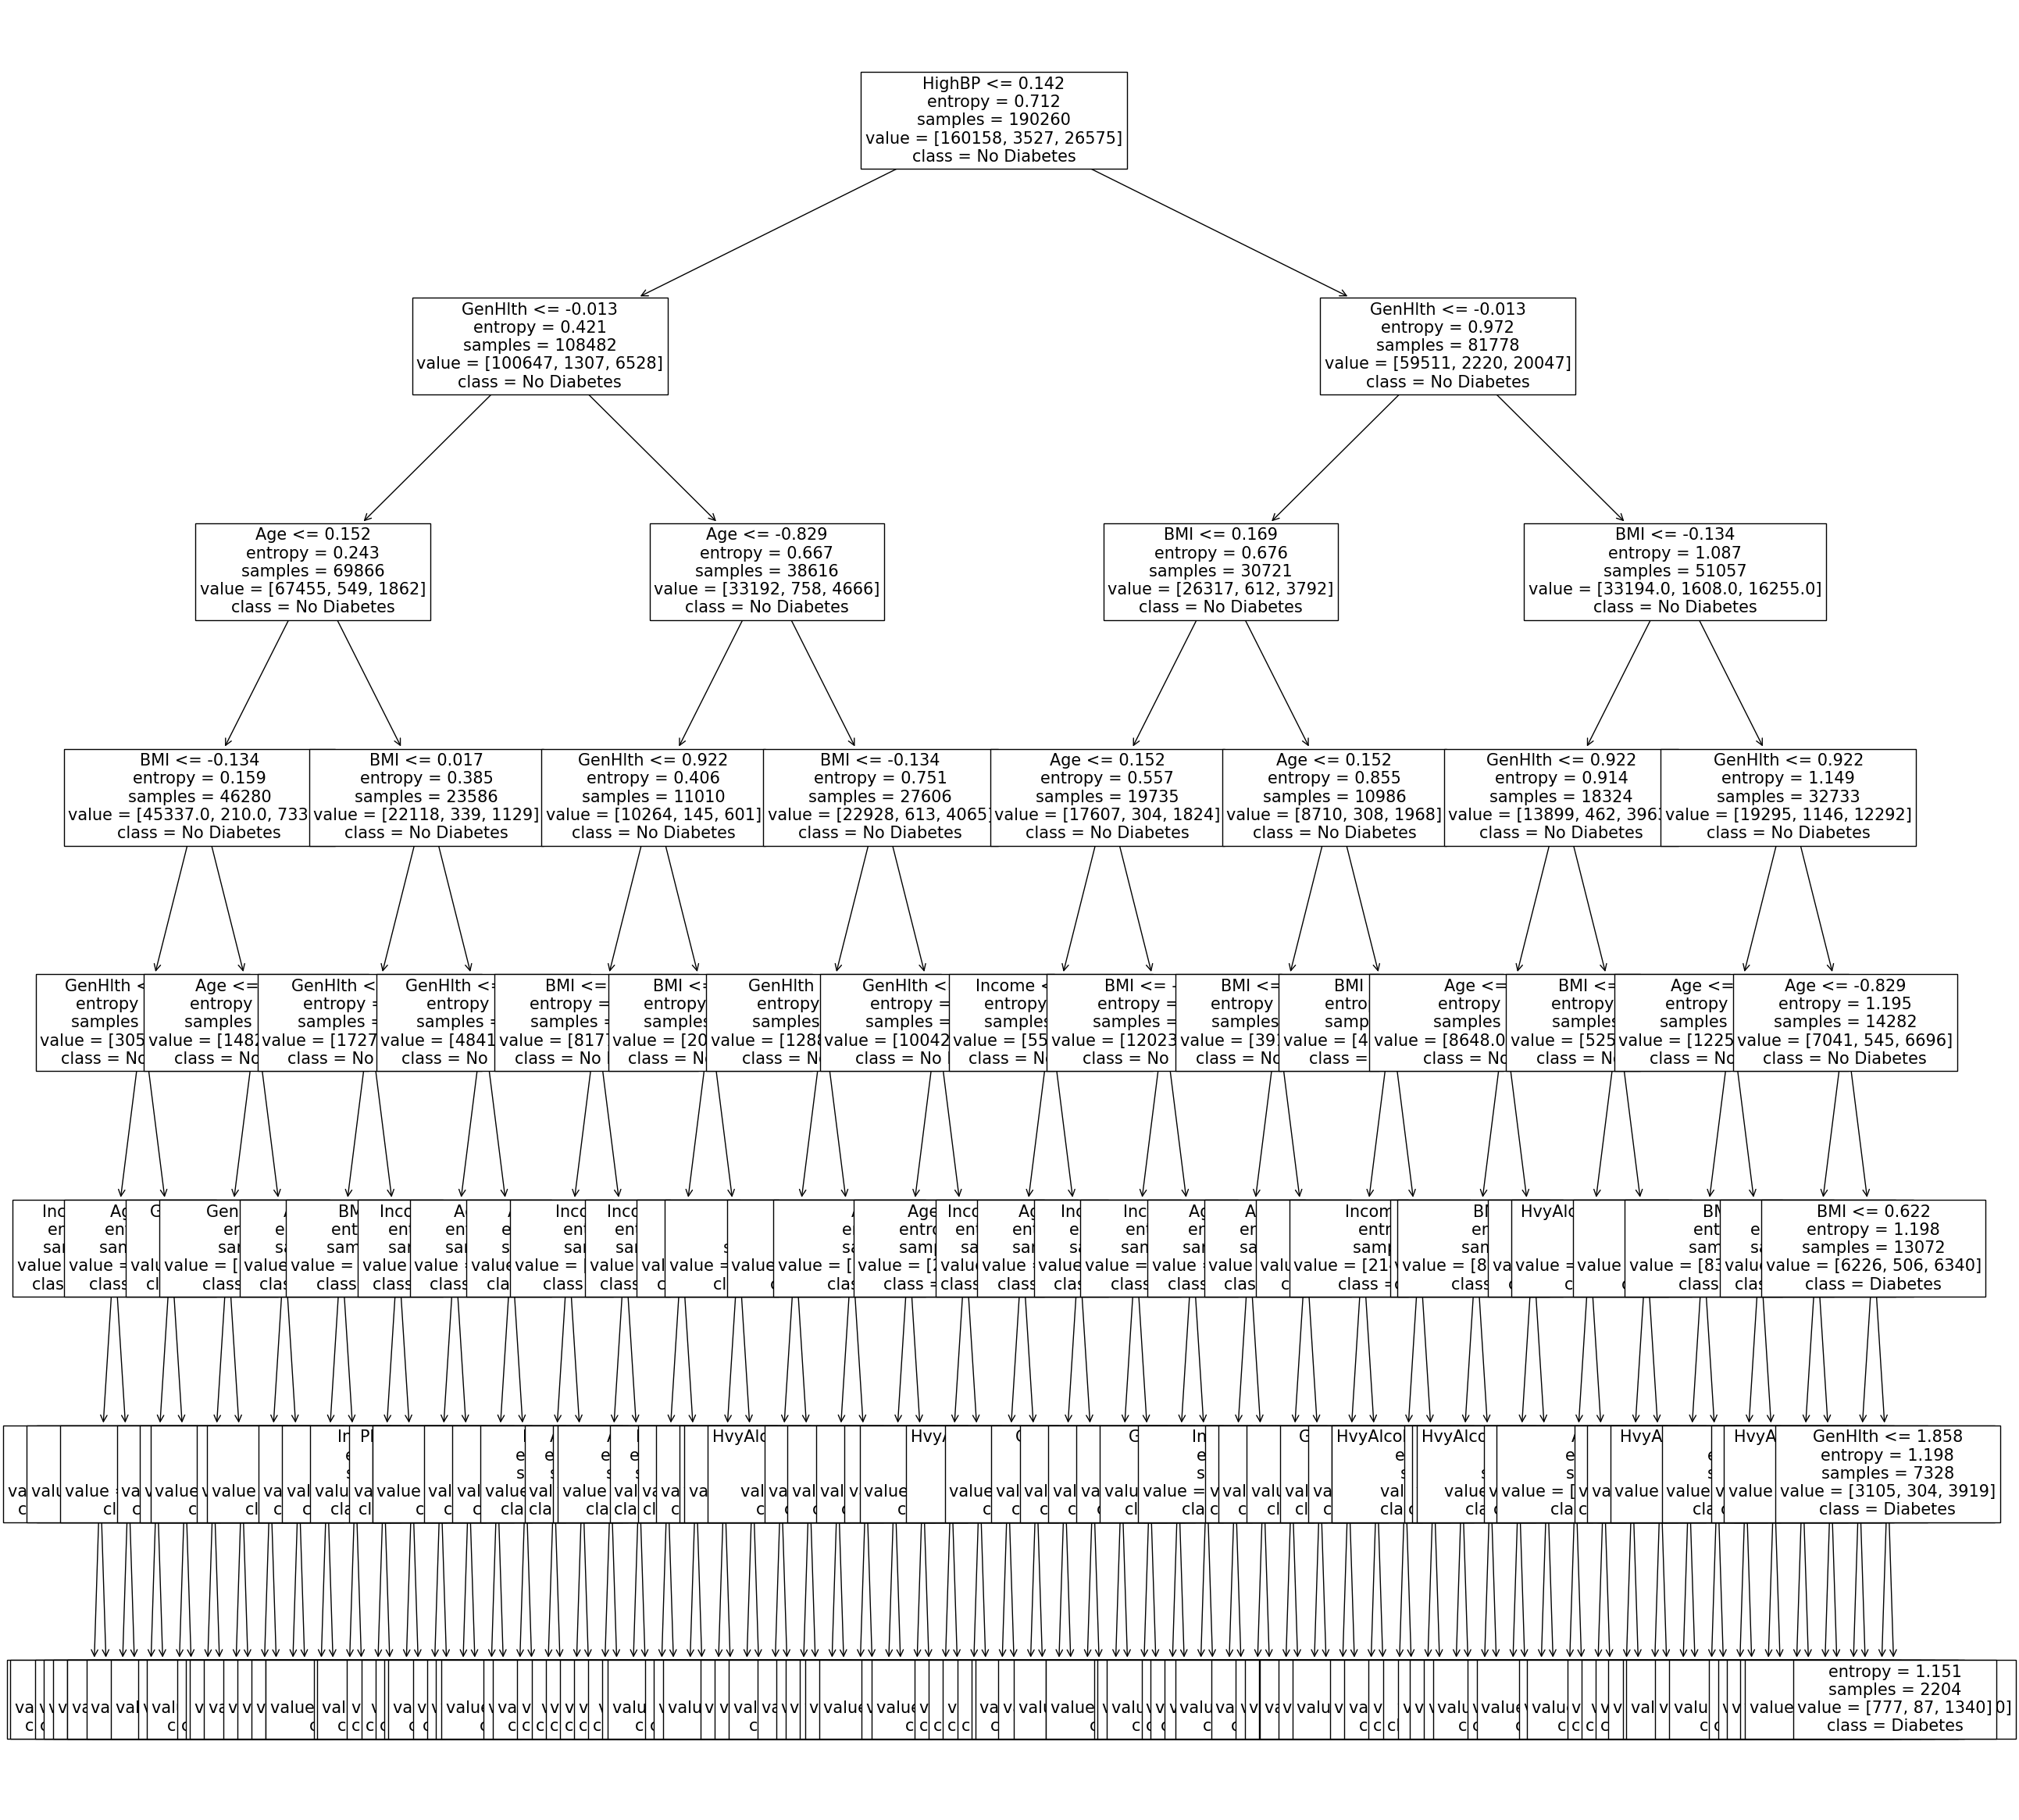

In [71]:
plt.figure(figsize=(30, 30))
X_train_columns = X.columns
class_n = ['No Diabetes', 'Prediabetes', 'Diabetes']
plot_tree(clf_model, max_depth=7, feature_names=X_train_columns, class_names = class_n,fontsize=15)

### Random Forest

In [72]:
from scipy.stats import randint
params = {'n_estimators': randint(10, 50), 'max_depth':randint(1, 15)}

rf = RandomForestClassifier()

r_search = RandomizedSearchCV(rf, params)

r_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1298d5790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x129a02bd0>})

In [73]:
best = r_search.best_estimator_
print(best)

RandomForestClassifier(max_depth=11, n_estimators=49)


In [74]:
rf.fit(X_train, y_train)
rf_y = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y)
print('Accuracy', rf_accuracy)

Accuracy 0.8263323872595396


Compare Gini and Entropy

In [75]:
random_forest_gini = RandomForestClassifier(n_estimators=25, criterion='gini', max_depth=13, random_state=24)

random_forest_gini.fit(X_train, y_train)
gini_y = random_forest_gini.predict(X_test)

random_gini_accuracy = accuracy_score(y_test, gini_y)
print(random_gini_accuracy)

0.847918637653737


In [76]:
random_forest_entropy = RandomForestClassifier(n_estimators=25, criterion='entropy', max_depth=13, random_state=24)

random_forest_entropy.fit(X_train, y_train)
entropy_y = random_forest_gini.predict(X_test)

random_entropy_accuracy = accuracy_score(y_test, entropy_y)
random_precision = precision_score(y_test, entropy_y, labels=[0], average=None, pos_label=0)
print(random_entropy_accuracy)
print(random_precision)

0.847918637653737
[0.86012841]


In [77]:
#Precision for each Class
precision_0_rf = precision_score(y_test, entropy_y , labels=[0], average=None, pos_label=0)
precision_1_rf = precision_score(y_test, entropy_y , labels=[1], average=None, pos_label=1)
precision_2_rf = precision_score(y_test, entropy_y , labels=[2], average=None, pos_label=2)

#Recall for each Class
recall_0_rf = recall_score(y_test, entropy_y , labels=[0], average=None, pos_label=0)
recall_1_rf = recall_score(y_test, entropy_y , labels=[1], average=None, pos_label=1)
recall_2_rf = recall_score(y_test, entropy_y , labels=[2], average=None, pos_label=2)

#F1 Score for each Class
f1_0_rf = f1_score(y_test, entropy_y , labels=[0], average=None, pos_label=0)
f1_1_rf = f1_score(y_test, entropy_y , labels=[1], average=None, pos_label=1)
f1_2_rf = f1_score(y_test, entropy_y , labels=[2], average=None, pos_label=2)

print('Accuracy:', random_entropy_accuracy, '\n')
print('Precision Class 0:', precision_0_rf)
print('Precision Class 1:', precision_1_rf)
print('Precision Class 2:', precision_2_rf, '\n')
print('Recall Class 0:', recall_0_rf)
print('Recall Class 1:', recall_1_rf)
print('Recall Class 2:', recall_2_rf, '\n')
print('F1 Score Class 0:', f1_0_rf)
print('F1 Score Class 1:', f1_1_rf)
print('F1 Score Class 2:', f1_2_rf)

Accuracy: 0.847918637653737 

Precision Class 0: [0.86012841]
Precision Class 1: [0.]
Precision Class 2: [0.53279729] 

Recall Class 0: [0.98078252]
Recall Class 1: [0.]
Recall Class 2: [0.14354122] 

F1 Score Class 0: [0.9165016]
F1 Score Class 1: [0.]
F1 Score Class 2: [0.22615412]


In [78]:
print(classification_report(y_test, entropy_y))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     53545
         1.0       0.00      0.00      0.00      1104
         2.0       0.53      0.14      0.23      8771

    accuracy                           0.85     63420
   macro avg       0.46      0.37      0.38     63420
weighted avg       0.80      0.85      0.81     63420



<Axes: >

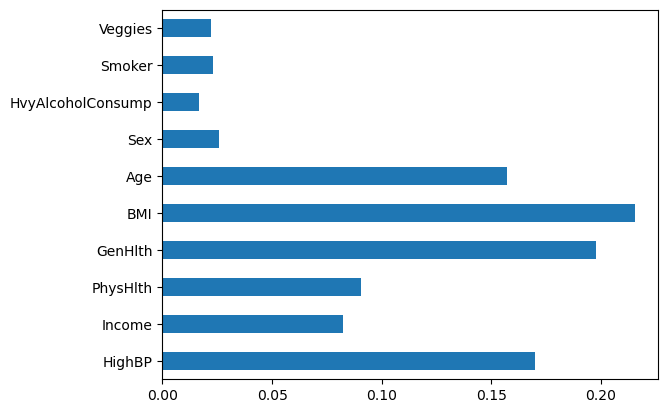

In [79]:
#Feature Importance
feature_importances = random_forest_entropy.feature_importances_

pd.Series(feature_importances, index=X.columns).plot(kind='barh')

0 AUC Score: 0.8084129326923645


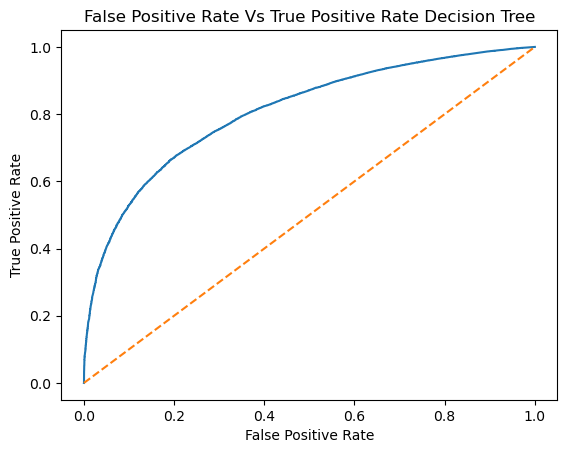

1 AUC Score: 0.6597071343251926


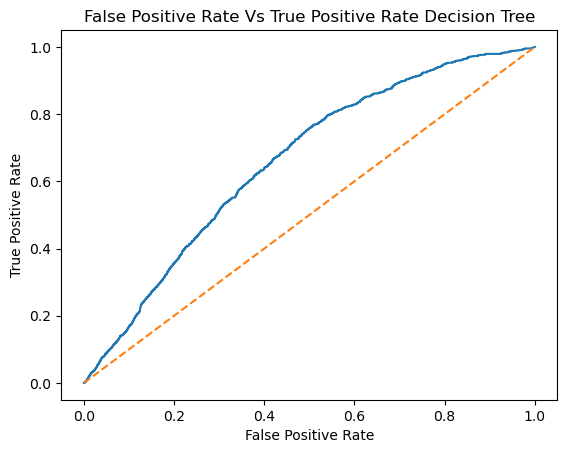

2 AUC Score: 0.8141973362997408


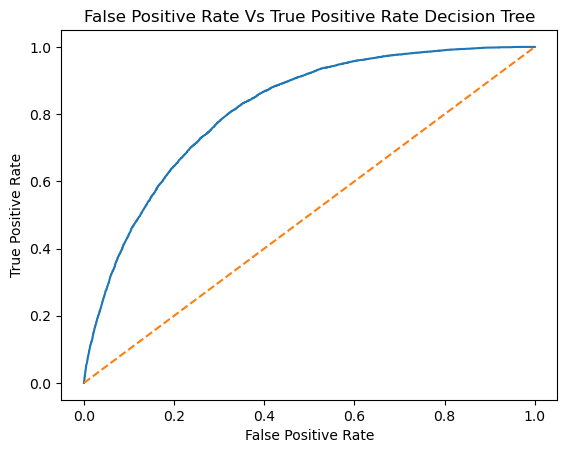

In [80]:
probs_rf = random_forest_entropy.predict_proba(X_test)

false_positive_rate_rf = {}
true_positive_rate_rf = {}
roc_auc_rf = {}

for i in range(3):
    false_positive_rate_rf[i], true_positive_rate_rf[i], threshold_rf = roc_curve((y_test == i).astype(int), probs_rf[:, i])
    roc_auc_rf = auc(false_positive_rate_rf[i], true_positive_rate_rf[i])

    print(i, 'AUC Score:', roc_auc_rf)
    plt.plot(false_positive_rate_rf[i], true_positive_rate_rf[i])
    plt.plot([0,1], [0,1], '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('False Positive Rate Vs True Positive Rate Decision Tree')
    plt.show()

## KNN Classifer

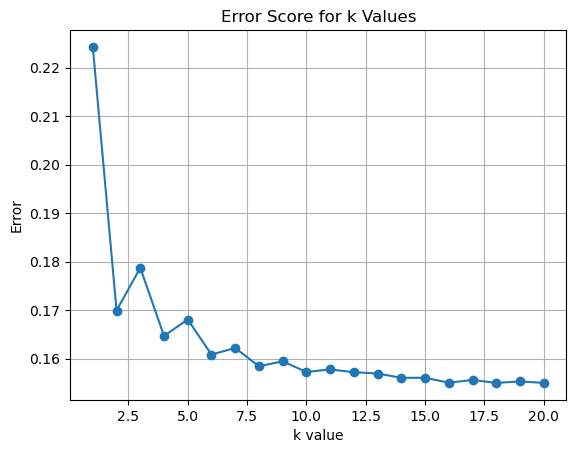

In [81]:
k_vals = range(1, 21)  
accuracyls = []
errorls = []
precisionls = []
recallls = []
f1ls = []

for k in k_vals:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)  
    
    y_pred = knn_model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred) 
    accuracyls.append(accuracy)

    # error 
    errorls.append(1 - accuracy)

    #  precision and recall
    precisionls.append(precision_score(y_test, y_pred, average='weighted'))
    recallls.append(recall_score(y_test, y_pred, average='weighted'))
    f1ls.append(f1_score(y_test, y_pred, average='weighted'))

# plot the accuracy for different k values
plt.plot(k_vals, errorls, marker='o')
plt.title('Error Score for k Values')
plt.xlabel('k value')
plt.ylabel('Error')
plt.grid(True)
plt.show()

In [82]:
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train) 
    
y_pred = knn_model.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred)

prec0 = precision_score(y_test, y_pred, labels=[0], average=None, pos_label=0)
prec1 = precision_score(y_test, y_pred, labels=[1], average=None, pos_label=1)
prec2 = precision_score(y_test, y_pred, labels=[2], average=None, pos_label=2)

rec0 = recall_score(y_test, y_pred, labels=[0], average=None, pos_label=0)
rec1 = recall_score(y_test, y_pred, labels=[1], average=None, pos_label=1)
rec2 = recall_score(y_test, y_pred, labels=[2], average=None, pos_label=2)

f10 = f1_score(y_test, y_pred, labels=[0], average=None, pos_label=0)
f11 = f1_score(y_test, y_pred, labels=[1], average=None, pos_label=1)
f12 = f1_score(y_test, y_pred, labels=[2], average=None, pos_label=2)

print('Accuracy:', accuracy)

print("Precision Class 0:", prec0)
print("Precision Class 1:", prec1)
print("Precision Class 2:", prec2)

print("Recall Class 0:", rec0)
print("Recall Class 1:", rec1)
print("Recall Class 2:", rec2)

print("F1 Class 0:", f10)
print("F1 Class 1:", f11)
print("F1 Class 2:", f12)

Accuracy: 0.8415799432355724
Precision Class 0: [0.86133395]
Precision Class 1: [0.]
Precision Class 2: [0.45726357]
Recall Class 0: [0.97051079]
Recall Class 1: [0.]
Recall Class 2: [0.160415]
F1 Class 0: [0.91266893]
F1 Class 1: [0.]
F1 Class 2: [0.23750844]


## SMOTE Implementation

In [84]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train) 
    
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

prec0 = precision_score(y_test, y_pred, labels=[0], average=None, pos_label=0)
prec1 = precision_score(y_test, y_pred, labels=[1], average=None, pos_label=1)
prec2 = precision_score(y_test, y_pred, labels=[2], average=None, pos_label=2)

rec0 = recall_score(y_test, y_pred, labels=[0], average=None, pos_label=0)
rec1 = recall_score(y_test, y_pred, labels=[1], average=None, pos_label=1)
rec2 = recall_score(y_test, y_pred, labels=[2], average=None, pos_label=2)

f10 = f1_score(y_test, y_pred, labels=[0], average=None, pos_label=0)
f11 = f1_score(y_test, y_pred, labels=[1], average=None, pos_label=1)
f12 = f1_score(y_test, y_pred, labels=[2], average=None, pos_label=2)

print('Accuracy:', accuracy)

print("Precision Class 0:", prec0)
print("Precision Class 1:", prec1)
print("Precision Class 2:", prec2)

print("Recall Class 0:", rec0)
print("Recall Class 1:", rec1)
print("Recall Class 2:", rec2)

print("F1 Class 0:", f10)
print("F1 Class 1:", f11)
print("F1 Class 2:", f12)

Accuracy: 0.6954903815830968
Precision Class 0: [0.91091947]
Precision Class 1: [0.02381382]
Precision Class 2: [0.29833287]
Recall Class 0: [0.74174993]
Recall Class 1: [0.11956522]
Recall Class 2: [0.48557747]
F1 Class 0: [0.81767649]
F1 Class 1: [0.03971717]
F1 Class 2: [0.36959257]


0 AUC Score: 0.7379154323052538


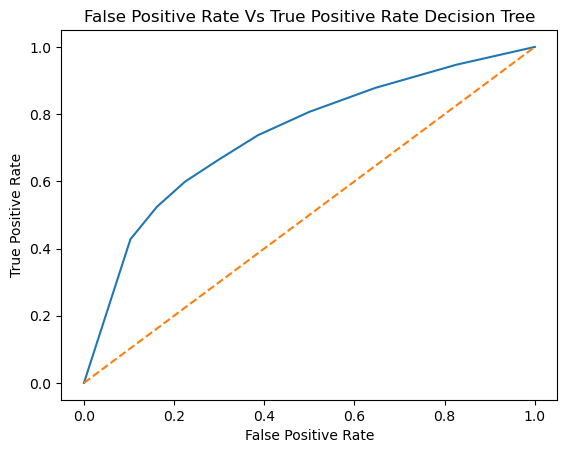

1 AUC Score: 0.5378660065086687


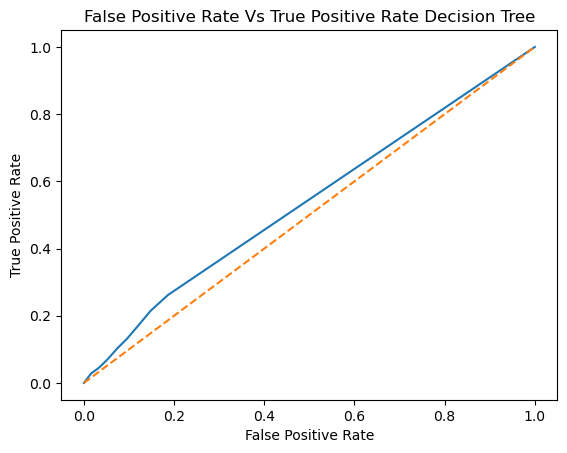

2 AUC Score: 0.7116747104794747


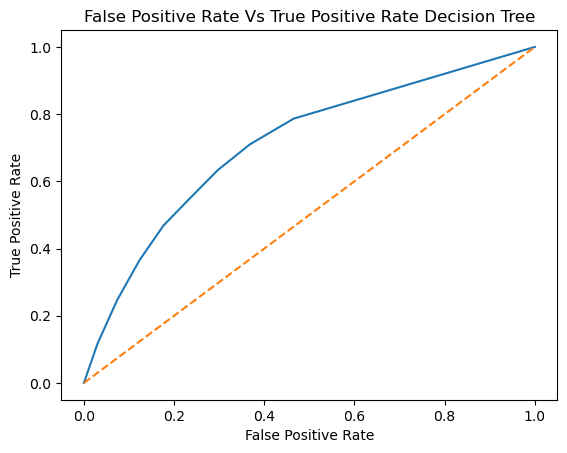

In [85]:
probs = knn_model.predict_proba(X_test)

false_positive_rate = {}
true_positive_rate = {}
roc_auc = {}

for i in range(3):
    false_positive_rate[i], true_positive_rate[i], threshold = roc_curve((y_test == i).astype(int), probs[:, i])
    roc_auc = auc(false_positive_rate[i], true_positive_rate[i])

    print(i, 'AUC Score:', roc_auc)
    plt.plot(false_positive_rate[i], true_positive_rate[i])
    plt.plot([0,1], [0,1], '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('False Positive Rate Vs True Positive Rate Decision Tree')
    plt.show()

## Logistic Regression

In [86]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep, conf_matrix

('              precision    recall  f1-score   support\n\n         0.0       0.86      0.98      0.92     64180\n         1.0       0.00      0.00      0.00      1425\n         2.0       0.52      0.15      0.23     10499\n\n    accuracy                           0.85     76104\n   macro avg       0.46      0.38      0.38     76104\nweighted avg       0.80      0.85      0.80     76104\n',
 array([[62820,     0,  1360],
        [ 1331,     0,    94],
        [ 8954,     0,  1545]]))

In [87]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the resampled training data
model.fit(X_train_res, y_train_res)


# Create a pipeline that first scales the data then applies SMOTE and fits a logistic regression model
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))
])

# Fit the pipeline to the training data
pipeline.fit(X_train_res, y_train_res)

# Predict or evaluate on your test set
y_pred = pipeline.predict(X_test)

# Generate report of metrics
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes']))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

 No Diabetes       0.95      0.67      0.78     64180
 Prediabetes       0.03      0.26      0.06      1425
    Diabetes       0.33      0.62      0.43     10499

    accuracy                           0.65     76104
   macro avg       0.44      0.51      0.42     76104
weighted avg       0.85      0.65      0.72     76104

[[42682  9092 12406]
 [  422   367   636]
 [ 1806  2211  6482]]


In [88]:
# Define the model
logreg = LogisticRegression(multi_class='multinomial')

# Create a dictionary of hyperparameters to search
param_grid = {'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
              'C': [0.01, 0.1, 1, 10, 100],
              'max_iter': [1000, 2000, 3000]}

# Set up GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro')

# Perform the grid search with the resampled data
grid_search.fit(X_train, y_train)

# Find the best hyperparameters
best_params = grid_search.best_params_

print(best_params)

KeyboardInterrupt: 

The code above took long to run, but it worked in a different notebook so we just put it here.

{'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}

In [89]:
LogisticRegression(C=10, max_iter=1000, solver='lbfgs', multi_class='multinomial',class_weight='balanced')

LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [90]:
# Generate classification report
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes']))

              precision    recall  f1-score   support

 No Diabetes       0.95      0.67      0.78     64180
 Prediabetes       0.03      0.26      0.06      1425
    Diabetes       0.33      0.62      0.43     10499

    accuracy                           0.65     76104
   macro avg       0.44      0.51      0.42     76104
weighted avg       0.85      0.65      0.72     76104

